In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
print("Форматы столбцов:")
print(df.dtypes)

Форматы столбцов:
Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [5]:
grouped_df = df.groupby('Дата').agg(
    Общее_количество_продаж=('Количество', 'sum'),
    Количество_сделок=('Количество', 'count')
).reset_index()

Вывести несколько первых строк сгруппированных данных

In [6]:
print("\nСгруппированные данные:")
print(grouped_df.head())


Сгруппированные данные:
        Дата  Общее_количество_продаж  Количество_сделок
0 2018-01-04                     3734               1840
1 2018-01-05                     3643               1301
2 2018-01-06                     3193               1306
3 2018-01-07                     3298               1322
4 2018-01-09                     4055               1719


Нарисуйте график продаж у `grouped_df`

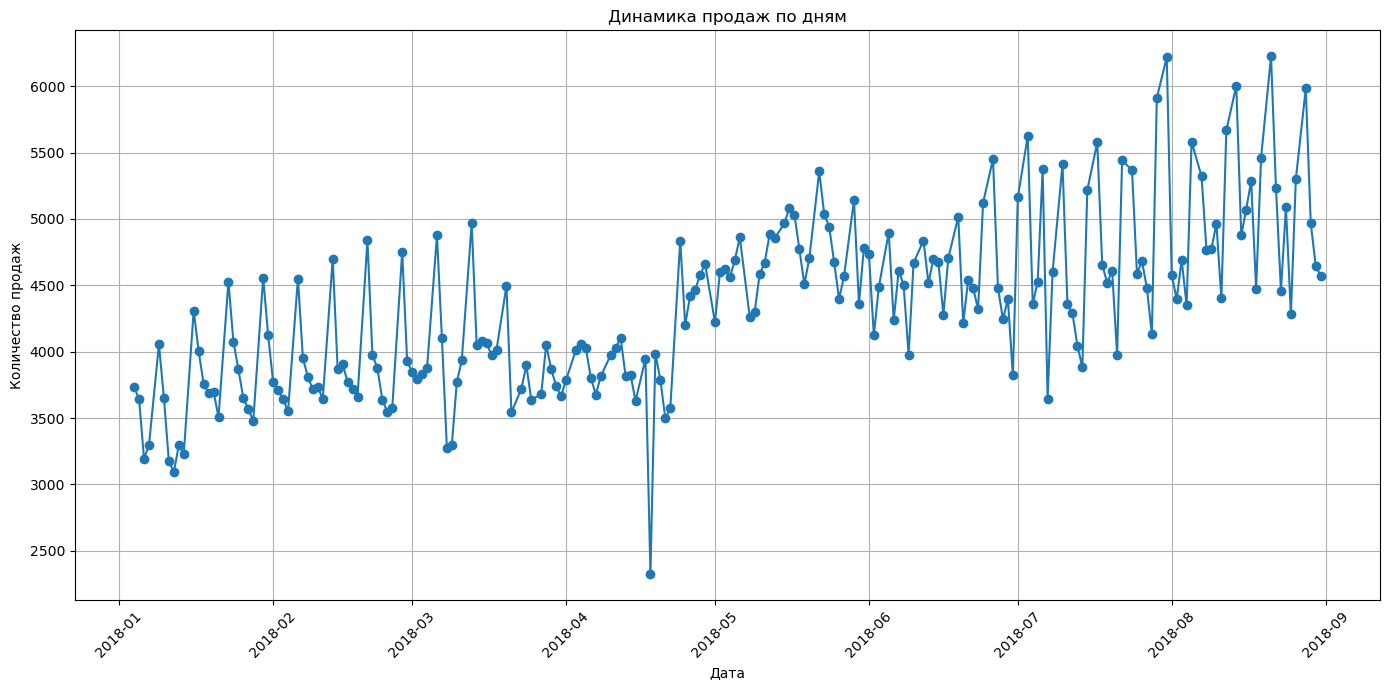

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(grouped_df['Дата'], grouped_df['Общее_количество_продаж'], marker='o')
plt.title('Динамика продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

# График показывает:
# - Сезонные колебания продаж
# - Наличие выбросов (пиков продаж)
# - Общие тренды продаж
# - Дни с минимальными продажами

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [8]:
max_outlier = df.loc[df['Количество'].idxmax()]
print("\nСтрока с максимальным выбросом:")
print(max_outlier)


Строка с максимальным выбросом:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
top_product = df[(df['Дата'].dt.month.isin([6, 7, 8])) & 
                (df['Дата'].dt.dayofweek == 2) & 
                (df['Склад'] == 3)] \
    .groupby('Номенклатура')['Количество'] \
    .sum() \
    .sort_values(ascending=False)

print("\nТоп товар по средам за июнь-август склада 3:")
print(top_product.head())


Топ товар по средам за июнь-август склада 3:
Номенклатура
product_1    2267
product_2    2060
product_0    1324
product_3     914
product_6     650
Name: Количество, dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [10]:
import pandas as pd

weather = pd.read_csv(
    r"C:\Users\Asus\Downloads\арив погоды астана 2018.csv",
    sep=';',            
    encoding='cp1251',
    skiprows=0         
)

weather.head()

,Местное время в Астане,T
0,31.12.2018,-18.4
1,31.12.2018,-17.2
2,31.12.2018,-14.8
3,31.12.2018,-11.2
4,31.12.2018,-12.7


In [13]:
df['Дата'] = pd.to_datetime(df['Дата'])


grouped_df = (
    df
    .groupby('Дата')['Количество']
    .sum()
    .reset_index()
    .rename(columns={'Количество': 'Количество продаж'})
)

grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


In [14]:
weather = pd.read_csv(
    r"C:\Users\Asus\Downloads\арив погоды астана 2018.csv",
    sep=';', 
    encoding='cp1251'
)

weather.head()

,Местное время в Астане,T
0,31.12.2018,-18.4
1,31.12.2018,-17.2
2,31.12.2018,-14.8
3,31.12.2018,-11.2
4,31.12.2018,-12.7


In [15]:
weather = weather[['Местное время в Астане', 'T']]
weather.head()

,Местное время в Астане,T
0,31.12.2018,-18.4
1,31.12.2018,-17.2
2,31.12.2018,-14.8
3,31.12.2018,-11.2
4,31.12.2018,-12.7


In [16]:
weather['Дата'] = pd.to_datetime(weather['Местное время в Астане'], dayfirst=True)

weather_daily = (
    weather
    .groupby(weather['Дата'].dt.date)['T']
    .mean()
    .reset_index()
)

weather_daily['Дата'] = pd.to_datetime(weather_daily['Дата'])
weather_daily.rename(columns={'T': 'T'}, inplace=True)

weather_daily.head()

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625


In [17]:
merged_df = grouped_df.merge(weather_daily, on='Дата', how='inner')
merged_df.head()

,Дата,Количество продаж,T
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500


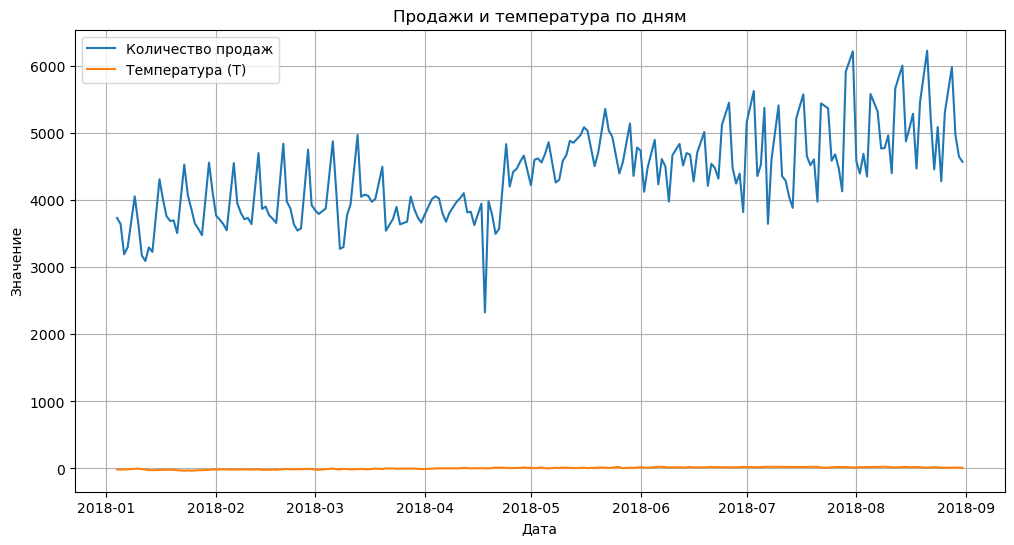

In [18]:
plt.figure(figsize=(12,6))

plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура (T)')

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Продажи и температура по дням')
plt.legend()
plt.grid(True)

plt.show()

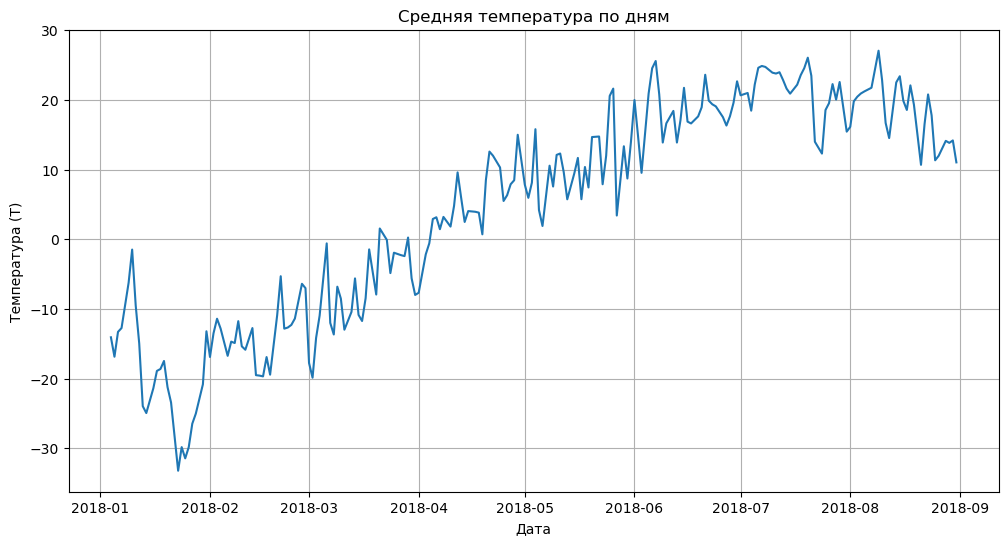

In [19]:
plt.figure(figsize=(12,6))

plt.plot(merged_df['Дата'], merged_df['T'])
plt.xlabel('Дата')
plt.ylabel('Температура (T)')
plt.title('Средняя температура по дням')
plt.grid(True)

plt.show()